# Gradient Descent

### Find the local minimum of a quadratic equation

In [1]:
import numpy as np
import seaborn as sns

import bokeh.plotting as bp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from scipy import stats 
from bokeh.models import  WheelZoomTool, ResetTool, PanTool

W = 450
H = 450
bp.output_notebook()
%matplotlib notebook

plt.rcParams["animation.html"] = "jshtml" 

Loading BokehJS ...

### Minimizing a quadratic equation

To start, let's suppose we have a simple quadratic function, $ f(x) = x^2 − 6x + 5$, and we want to find the minimum of this function. We can solve this analytically using calculus, by finding the derivate and setting it to zero:

$$\begin{align}
f'(x) = 2x - 6 \\
2x - 6  = 0\\
2x = 6\\
x = 3\end{align}$$

By simply plotting the function, we can see that the local minimum is indeed at 3:

In [2]:
# <!-- collapse=True -->

x = np.linspace(-15,21,100)
y = x**2-6*x+5

TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]

###  Gradient Descent

Gradient descent - it's an iterative function using the steepest descent. To find the local minimum, you start at a random point, and move into the direction of steepest descent relative to the gradient, i.e. into the direction that goes down (hence, *descent*). 

In this example, let's suppose we start at $x = 15$. The gradient at this point is $2 \times 15 - 6 = 24$. Because we're using gradient *descent*, we need to subtract the gradient from our $x$-coordinate. However, notice that $16 - 25$ gives us $-9$, clearly overshooting over target of $-3$. To fix this, we multiply the gradient by a *step size*. In this example, we'll set the step size to 0.01, which means we'll subtract $24 \times 0.01$ from 15, which is $14.76$. This is now our new temporary local minimum: We continue this method until we either don't see a change after we subtracted the gradient * step size, or until we've completed a pre-set number of iterations. 

The algorithm stops when the values between the new and the temporary minimum do not differ by more than 0.001 - if we need more precision, we can decrease this value. According to gradient descent, the local minimum occurs at $3.05$, which is not too far off from the true local minimum.

In [3]:
old_min = 0
temp_min = 15
step_size = 0.001
precision = 0.001
 
def f_derivative(x):
    return 2*x -6

mins = []
cost = []

while abs(temp_min - old_min) > precision:
    old_min = temp_min 
    gradient = f_derivative(old_min) 
    move = gradient * step_size
    temp_min = old_min - move
    cost.append((3-temp_min)**2)
    mins.append(temp_min)
 
print("Local minimum occurs at {}.".format(round(temp_min,2)))

Local minimum occurs at 3.5.


We can visualize the gradient descent by plotting all temporary local minima on the curve. As you can see, the improvement decreases over time; at the end, the local minimum barely improves.

<IPython.core.display.Javascript object>


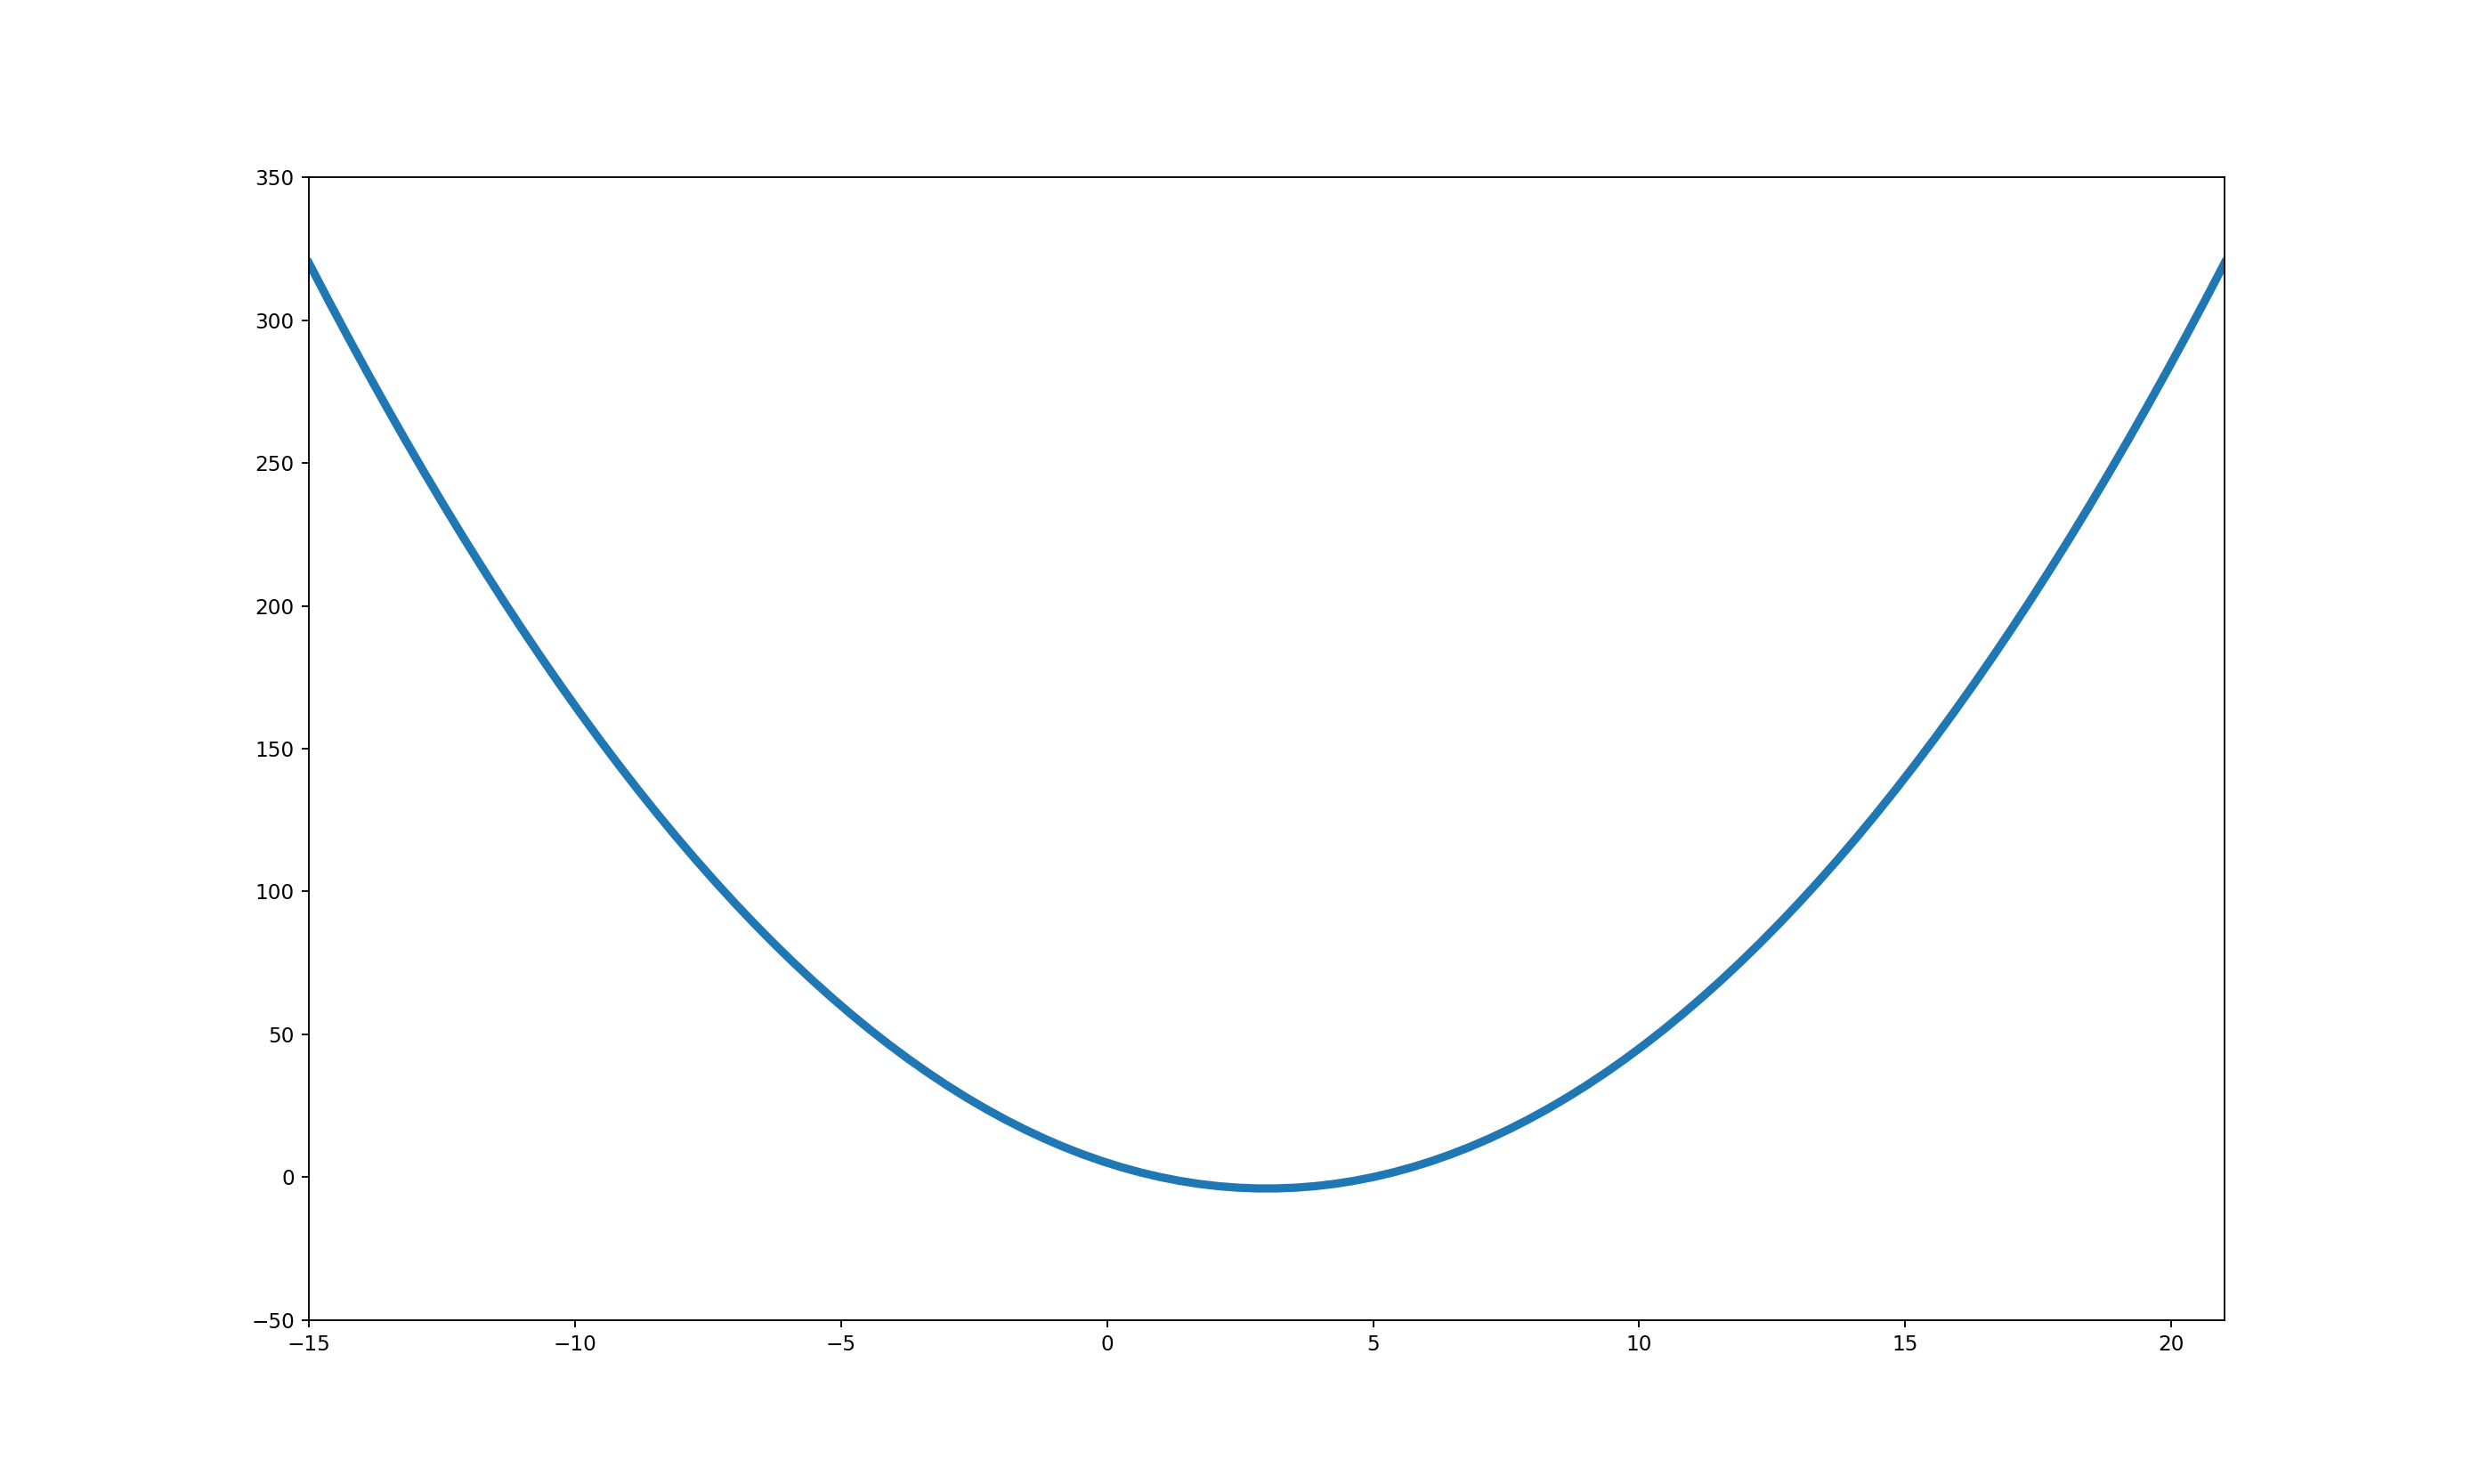

In [4]:
# <!-- collapse=True -->

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x_n = mins[0::10][i]
    y_n = x_n**2-6*x_n+5
    line.set_data(x_n, y_n)
    return line,

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(xlim=(-15, 21), ylim=(-50, 350))
ax.plot(x,y, linewidth=4 )
line, = ax.plot([], [], "D", markersize=12)
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(mins[0::10]), interval=200)

Another important visualization of gradient descent is that there should be a visible improvement over time: In this example, I simply plotted the squared distance from the local minima calculated by gradient descent and the true local minimum against the iteration during which it was calculated. As we can see, the distance gets smaller over time, but barely changes in later iterations. This measure of distance is often called the *cost* or *loss*, but the implementation differs depending on what function you're trying to minimize. 

In [5]:
# <!-- collapse=True -->
TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]

x, y = (zip(*enumerate(cost)))
s1 = bp.figure(width=W, 
               height=H, 
               title='Squared distance to true local minimum',  
               tools=TOOLS,
               x_axis_label = 'Iteration',
               y_axis_label = 'Distance'
)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.title.text_font_size = '14pt'
s1.yaxis.axis_label_text_font_size = "12pt"
s1.xaxis.axis_label_text_font_size = "12pt"

bp.show(s1)